<a href="https://colab.research.google.com/github/bastianbm7/spotify-populartiy-prediction/blob/main/Proyecto_final_MGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Trabajo final

# **Trabajo final**: Modelos lineales generalizados
## Análisis de popularidad de canciones en la plataforma Spotify del top de artistas de reguetón: Un enfoque logístico mediante modelos lineales generalizados características de pistas.
Bastian Barraza| Emilia sepúlveda| Hilda Núñez

12 de diciembre del 2023

El siguiente archivo contiene los códigos y funciones utilizados para el desarollo del trabajo, las interpretaciones correspondientes se encuentran en el informe adjunto.

# Importar librerías

In [ ]:
install.packages("robustbase")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘DEoptimR’




In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
install.packages("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [ ]:
install.packages("ggcorplor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggcorplor’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’




In [ ]:
library(robustbase)
library(ggplot2)
library(tidyr)
library(dplyr)
library(pROC)
library(GGally)
library(ggcorrplot)
library(skimr)

# Leer y procesar datos

In [ ]:
# Read data
library(tidyr)
#df <- read.csv('data\\concatened_songs.csv')
df <- read.csv('/content/concatened_songs.csv')
# Select variables to use in df
vars = c('track_popularity', 'track_duration', 'track_danceability',
        'track_energy', 'track_key', 'track_loudness',
        'track_speechiness', 'track_acousticness',
        'track_instrumentalness', 'track_liveness',
        'track_valence', 'track_tempo')

df = df[vars]

# Standarize data
df_standar <- scale(df)
df_standarized = data.frame(df_standar)

# Change columns names
names(df_standarized) = c('Popularidad', 'Duración', 'Bailable',
              'Energía', 'Clave', 'Volumen',
              'Hablado', 'Acústica',
              'Instrumental', 'En Vivo',
              'Valencia', 'Tempo')

# Dicotomizar variable
mean = mean(df_standarized$Popularidad)
df_standarized$Popularidad = ifelse(df_standarized$Popularidad > mean, 1, 0)
df_standarized$Popularidad <- factor(df_standarized$Popularidad)

# EDA

In [ ]:
names(df) = c('Popularidad', 'Duración', 'Bailable',
              'Energía', 'Clave', 'Volumen',
              'Hablado', 'Acústica',
              'Instrumental', 'En Vivo',
              'Valencia', 'Tempo')

## Boxplot

In [ ]:
eda_boxplot <- function(df){
    # Procesar datos para crear boxplot
    df_standarized <-  df_standarized %>%
      mutate('ID' = row_number(df_standarized))

    df_long <- gather(df_standarized, key = "Variable", value = "Value", -ID)

    # Paleta de colores discreta
    colores_discretos <- scale_fill_manual(values = c("#1f78b4", "#33a02c", "#e31a1c",
                                                      "#ff7f00", "#6a3d9a", "#a6cee3",
                                                      "#b2df8a", "#fb9a99", "#fdbf6f",
                                                      "#cab2d6", "#ffff99", "#1a1a1a"))

    # Crear el boxplot con ggplot2
    gg <- ggplot(df_long, aes(x = Variable, y = Value, fill = Variable)) +
        geom_boxplot() +
        colores_discretos +
        labs(title = "Boxplot de variables explicativas", x = "Variables", y = "Valor") +
        theme_minimal() +
        theme(
          axis.text.x = element_text(angle = 45, hjust = 1),  # Rotar etiquetas en el eje x
          text = element_text(size = 12),  # Tamaño de texto general
          plot.title = element_text(size = 16, face = "bold"),  # Tamaño y estilo del título
          axis.title = element_text(size = 14),  # Tamaño del título de los ejes
        )

    return(gg)
}

box <- eda_boxplot(df_standarized)
ggsave("graphs\\eda_boxplot.pdf", plot = box, width = 8, height = 6, units = "in")


Warning message:
“attributes are not identical across measure variables; they will be dropped”


In [ ]:
nrow(df)

[1] 477

## Pairs

In [ ]:
# Pairs with columns 2-6
pairs1 <- ggpairs(df_standarized[1:6], mapping=aes(color = Popularidad, alpha = 0.5),
    upper = list(combo = "facetdensity"))

# Pairs with columns 7-12
df_selected <- df_standarized %>%
    select(1, 7:12)
pairs2 <- ggpairs(df_selected, mapping=aes(color = Popularidad, alpha = 0.5),
    upper = list(combo = "facetdensity"))



In [ ]:
ggsave("graphs\\eda_pairs1.pdf", plot = pairs1, width = 8, height = 6, units = "in")
ggsave("graphs\\eda_pairs2.pdf", plot = pairs2, width = 8, height = 6, units = "in")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


## Correlation

In [ ]:
# Calculate correlations
corr <- round(cor(df_standarized[2:12]), 1)

# Make graph
correlation <- ggcorrplot(corr, lab = TRUE)

# Save graph
ggsave("graphs\\eda_correlations.pdf", plot = correlation, width = 8, height = 6, units = "in")


ERROR: ignored

MULTICOLINEALIDAD


In [ ]:
# Prueba de multicolinealidad (VIF)
library(car)
vif(model_log)


Duración  Volumen Valencia 
1.017364 1.067151 1.060198

# Prueba de bondad de ajuste

In [ ]:
# Prueba bondad de ajuste
hoslem.test(model_log$y, fitted(model_log), g = 10)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  model_log$y, fitted(model_log)
X-squared = 14.059, df = 8, p-value = 0.08024


La prueba de bondad de ajuste de Hosmer-Lemeshow evalúa si hay una diferencia significativa entre las frecuencias observadas y esperadas en distintos grupos de probabilidad predicha. Podemos ver que el valor del p value es mayor a nuestro alfa especificado, lo cual sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de que el modelo tiene un buen ajuste.


In [ ]:
install.packages("lmtest", repos = "http://cran.us.r-project.org", dependencies = TRUE)
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Formula’, ‘zoo’, ‘car’, ‘strucchange’, ‘sandwich’, ‘dynlm’, ‘AER’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
head(df_standarized[,c(1,2,6,11)])

,Popularidad,Duración,Volumen,Valencia
,<fct>,<dbl>,<dbl>,<dbl>
1,1,4.0178769772,0.1094228,0.18149889
2,1,1.6152480169,0.1129413,-2.05846163
3,1,0.5227202393,-0.0886156,-0.74025478
4,1,0.3438718935,-0.1866295,-0.08610701
5,1,-0.0586711228,-0.2253325,-0.59654050
6,1,-0.0006587075,0.1436020,-2.21159168


In [ ]:
model_lg<-glm(Popularidad~.,data=df_standarized[,c(1,2,6,11)],family =binomial())

In [ ]:
lrtest1<-lrtest(model_lg, modelo_lg)
lrtest1

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,-311.9536,NA,NA,NA
2,12,-308.2948,8,7.31772,0.5027729


# Detectar outliers con Mahalanobis

In [ ]:
df_standarized$Popularidad <- as.numeric(df_standarized$Popularidad)

# Calcular la matriz de covarianza
cov_matrix <- cov(df_standarized)

# Calcular la inversa de la matriz de covarianza
inv_cov_matrix <- solve(cov_matrix)

# Calcular la media de los datos
mean_vector <- colMeans(df_standarized)

# Calcular la distancia de Mahalanobis para cada observación
mahalanobis_dist <- mahalanobis(df_standarized, center = mean_vector, cov = cov_matrix)

# Establecer un umbral para identificar outliers (puedes ajustar este valor según tus necesidades)
umbral <- qchisq(0.95, df = length(mean_vector))

# Identificar outliers
outliers <- which(mahalanobis_dist > umbral)

# Eliminar outliers
df <- df_standarized[-outliers, ]

# Usar 0 - 1 en la variable respuesta y usar factor
df$Popularidad <- factor(df$Popularidad - 1)


In [ ]:

df_reducido<-df[,c(1,2,6,11)]


# Segundo modelo sin datos atipicos y valores esclados


In [ ]:
model_log<-glm(Popularidad~.,data = df_reducido,family =binomial())
summary(model_log)


Call:
glm(formula = Popularidad ~ ., family = binomial(), data = df_reducido)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.32779    0.09819   3.338 0.000843 ***
Duración     0.17511    0.11575   1.513 0.130334    
Volumen      0.28615    0.11474   2.494 0.012635 *  
Valencia    -0.26740    0.10342  -2.586 0.009722 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 603.79  on 443  degrees of freedom
Residual deviance: 588.82  on 440  degrees of freedom
AIC: 596.82

Number of Fisher Scoring iterations: 4


In [ ]:
confint(object = model_log, level = 0.95)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.1362020,0.52145387
Duración,-0.0501382,0.40477642
Volumen,0.0629652,0.51372336
Valencia,-0.4725388,-0.06641238


# Primer modelo con datos atipicos  y datos  escalados



In [ ]:
modelo_lg<- glm(Popularidad~.,data = df_standarized,family =binomial())
summary(modelo_lg)


Call:
glm(formula = Popularidad ~ ., family = binomial(), data = df_standarized)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.337001   0.096271   3.501 0.000464 ***
Duración      0.246230   0.101227   2.432 0.014997 *  
Bailable     -0.054891   0.135512  -0.405 0.685430    
Energía       0.190014   0.105329   1.804 0.071230 .  
Clave        -0.043180   0.097458  -0.443 0.657718    
Volumen       0.366296   0.133274   2.748 0.005988 ** 
Hablado      -0.078659   0.099437  -0.791 0.428921    
Acústica      0.155160   0.109443   1.418 0.156274    
Instrumental -0.006428   0.099608  -0.065 0.948546    
`En Vivo`     0.034685   0.100847   0.344 0.730896    
Valencia     -0.321027   0.106631  -3.011 0.002607 ** 
Tempo        -0.080448   0.097320  -0.827 0.408443    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 649.42  on 476  degrees of freedom
Residual

In [ ]:
#Intervalo para primer modelo
confint(object = modelo_lg, level = 0.95)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.14928103,0.5269961
Duración,0.05061821,0.4486097
Bailable,-0.32147428,0.2107806
Energía,-0.01581796,0.3979964
Clave,-0.23461741,0.1479504
Volumen,0.10800722,0.6315164
Hablado,-0.27559434,0.1150877
Acústica,-0.05795282,0.3718667
Instrumental,-0.20994447,0.2193427
`En Vivo`,-0.16142424,0.2355557


In [ ]:
# Residuales de Pearson
#resid(model_log, type = "pearson")

#Exploración de residuos

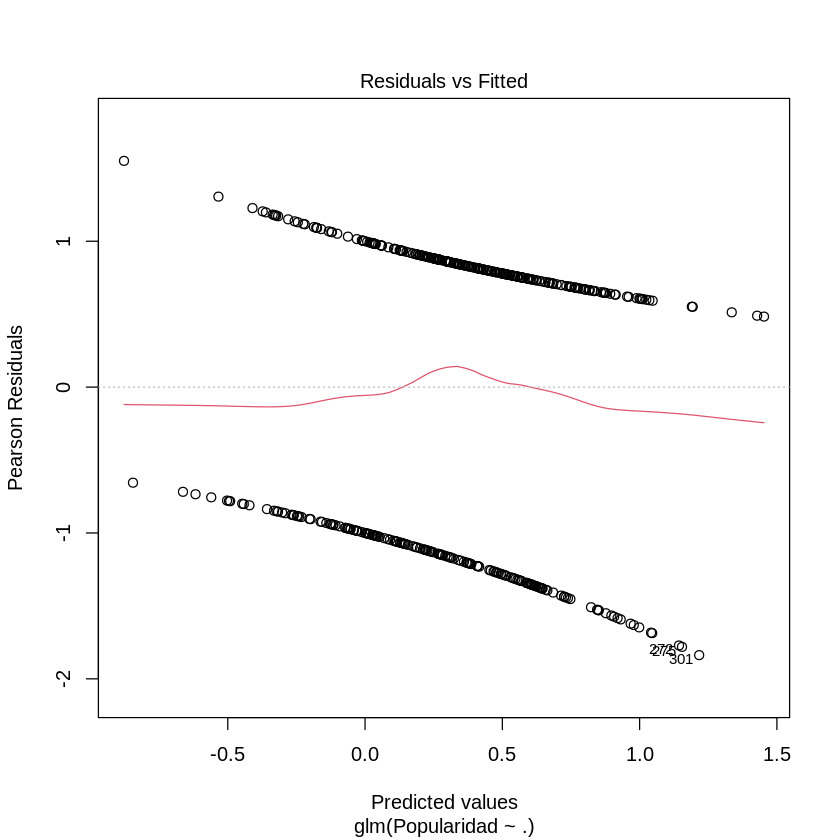

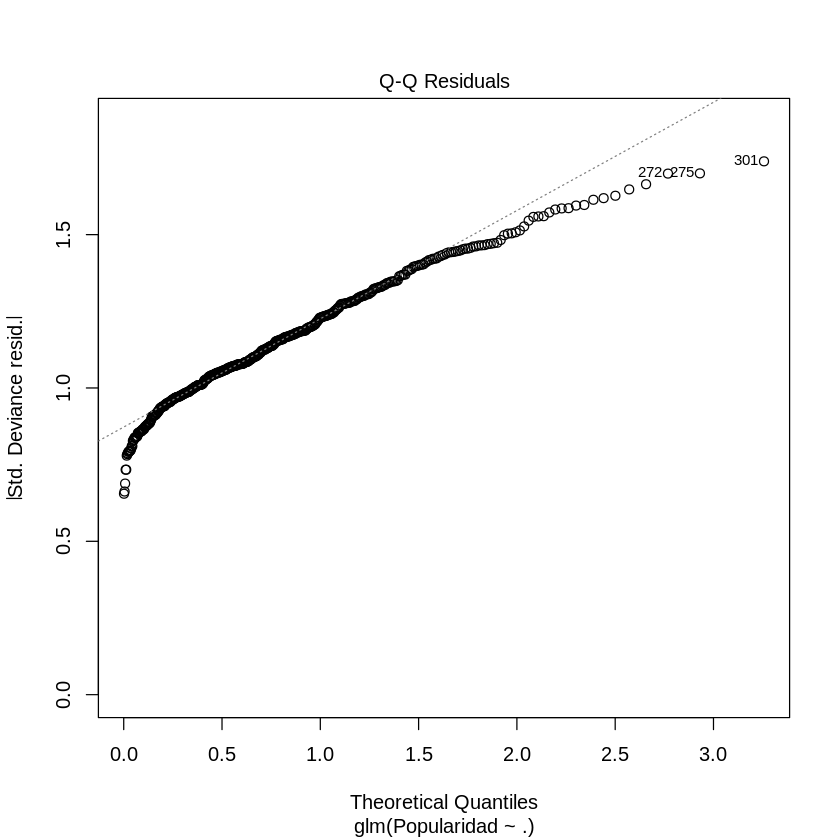

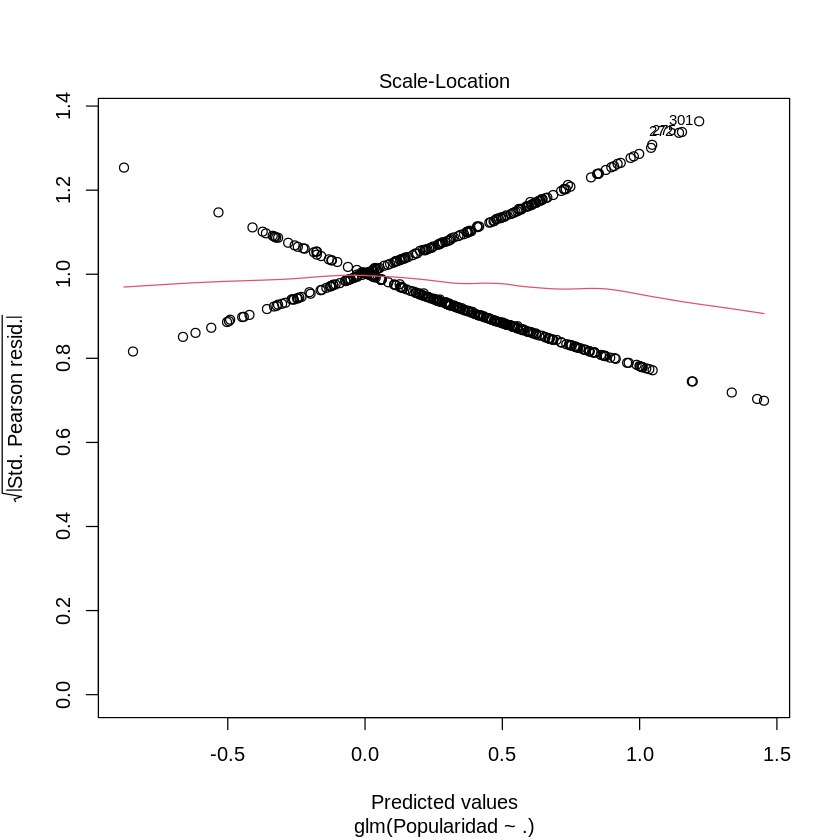

NULL

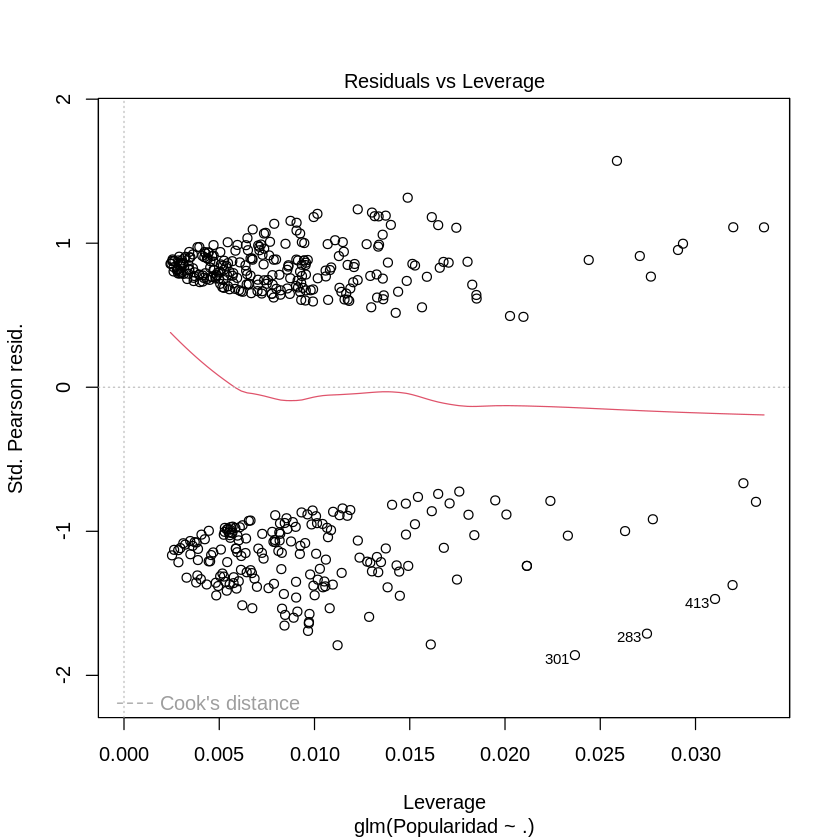

In [ ]:
plot(model_log)[1]

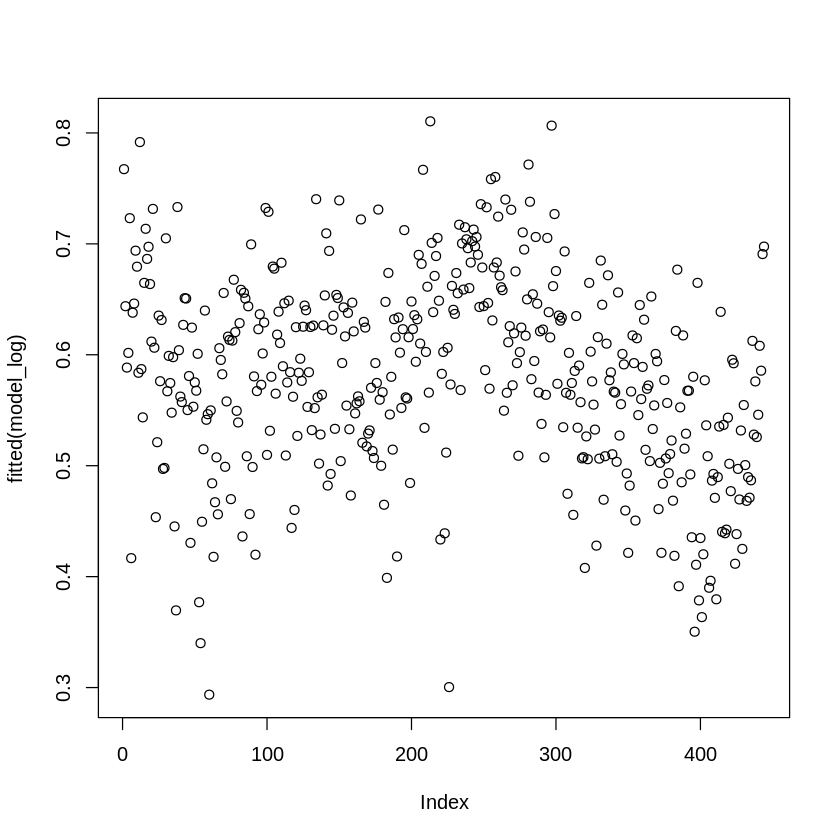

In [ ]:
plot(fitted(model_log))
abline(b=0)

## test de normalidad a los residuos

In [ ]:
shapiro.test(residuals(model_log))


	Shapiro-Wilk normality test

data:  residuals(model_log)
W = 0.74544, p-value < 2.2e-16


In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




# Estimaciones y curvas del segundo modelo


In [ ]:
install.packages("ggeffects")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘insight’




Data were 'prettified'. Consider using `terms="Volumen [all]"` to get
  smooth plots.



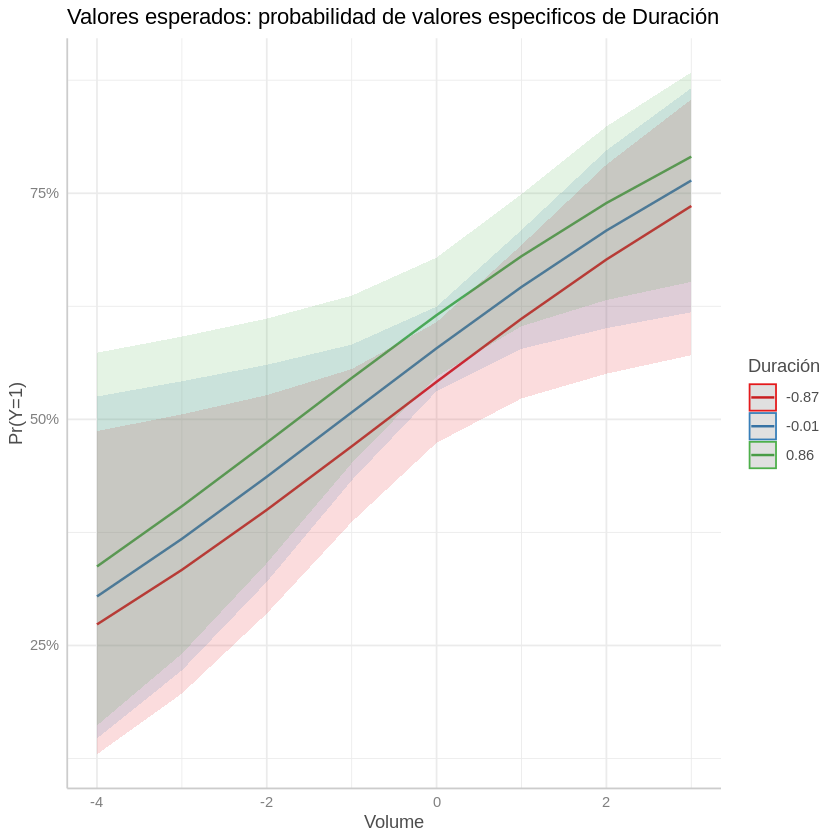

In [ ]:
library(ggeffects)

model_log %>%
  ggpredict(terms = c("Volumen", "Duración")) %>%
  plot() +
  labs(title = "Valores esperados: probabilidad de valores especificos de Duración",
  color = "Duración", x = "Volume", y = "Pr(Y=1)")

# Probar estimaciones del modelo a traves de curva y tabla de confusion


In [ ]:
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("rsample")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’




In [ ]:
##Datos para entrenar y probar

library(rsample)
set.seed(2021)
corte<- initial_split(df_reducido, prop = 0.8, strata = "Popularidad")

train <- training(corte)#entrenar
test  <- testing(corte) #probar
cat(" Proporción de datos ")
table(train$Popularidad) %>% prop.table()
#tabla de porcentaje de cada nivel en datos de entrenamiento


#Nueva base para train y balancear
library(ROSE)
Dtrain<-train
Dtrain$Popularidad<-as.factor(Dtrain$Popularidad)#convertimos en factor

Dtrain <- ovun.sample(Popularidad ~ ., data = Dtrain, method = "both", p=0.5, N=70, seed = 1)$data
#balanceamos los datos

cat(" Proporción de datos balanceados")
table(Dtrain$Popularidad) %>% prop.table()
#tabla de porcentaje de cada nivel en datos de entrenamiento ya balanceado


 Proporción de datos 


        0         1 
0.4193548 0.5806452 

 Proporción de datos balanceados


        1         0 
0.5142857 0.4857143 

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("pROC")
install.packages("ROCR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [ ]:
set.seed("75895206")
n<- nrow(df_reducido)
indin<- 1:n
nent<-ceiling(0.8*n)#obtenemos el 70 por ciento de los datoss
ntest<- n-nent #el otro 30 por ciento
indient<- sort(sample(indin,nent)) #tomamos aleatoriamente los indice para prueba
inditest<- setdiff(indin,indient)#tomamos aleatoriamente los indice para test

#Posición de la variable dependiente en la tabla:
vd = 11

modelo_GLM  <- glm(Popularidad~.,df_reducido[indient,], family=binomial)
probs_GLM   <- predict(modelo_GLM,df_reducido[inditest,], type="response")


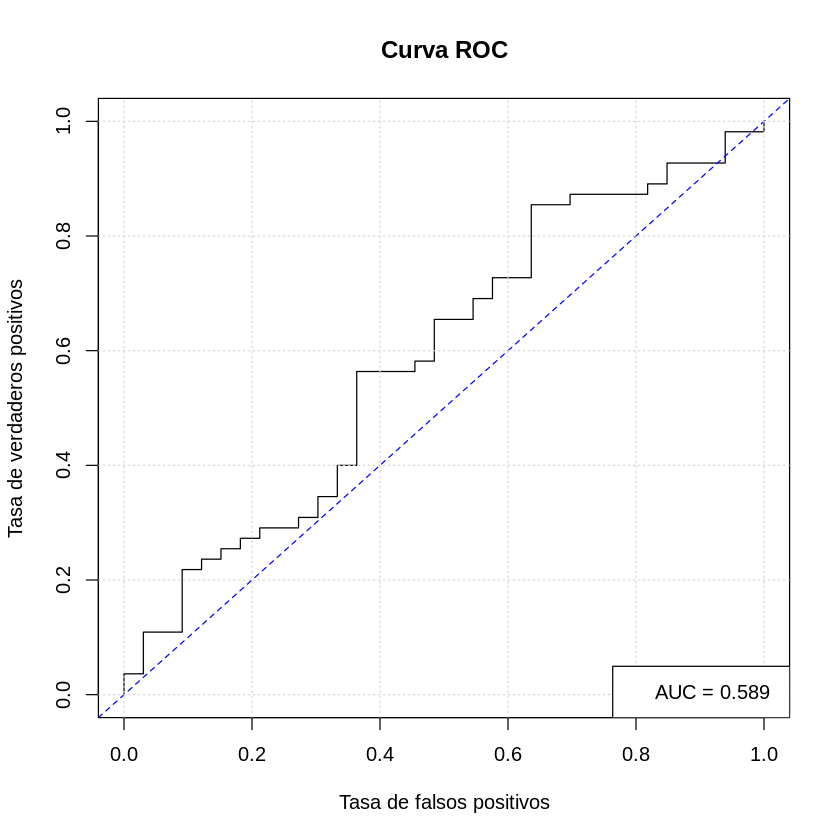

In [ ]:
library(ROCR)

real <- df_reducido[inditest,]$Popularidad

prediobj <-prediction(probs_GLM,real)
perf <-  performance(prediobj, "tpr","fpr")

plot(perf,
     main = "Curva ROC",
     xlab="Tasa de falsos positivos",
     ylab="Tasa de verdaderos positivos")
abline(a=0,b=1,col="blue",lty=2)
grid()
auc <- as.numeric(performance(prediobj,"auc")@y.values)
legend("bottomright",legend=paste(" AUC =",round(auc,4)))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



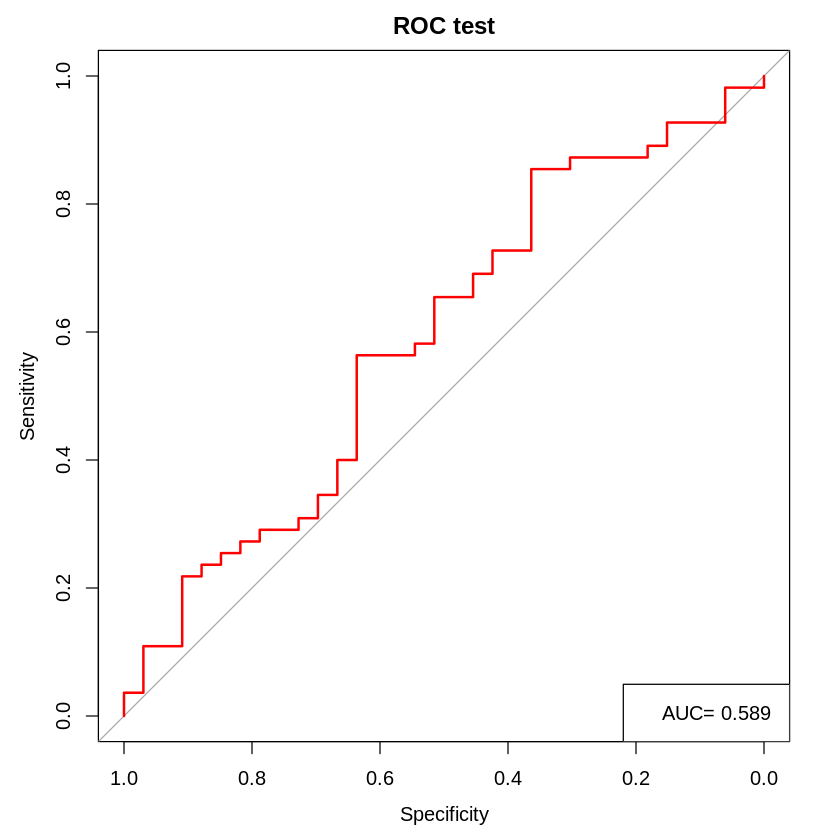

In [ ]:
library(pROC)

roc <- roc(real,probs_GLM)

plot(roc,col="red",lwd=2,main="ROC test")
legend("bottomright",legend=paste("AUC=",round(auc(roc),4)))